### Train and compare a lightweight custom CNN, MobileNet, and a ResNet-18 approximation with ResNet-50. This enables you to compare the architectures on CIFAR-10.

In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNet, ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [14]:
def build_lightweight_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPool2D((2,2)),
        Dropout(0.25),
        
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPool2D((2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
def build_mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



Training Lightweight CNN:
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.2707 - loss: 1.9893 - val_accuracy: 0.5080 - val_loss: 1.3946
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.4647 - loss: 1.4819 - val_accuracy: 0.5641 - val_loss: 1.2294
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.5237 - loss: 1.3237 - val_accuracy: 0.6116 - val_loss: 1.1286
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.5669 - loss: 1.2202 - val_accuracy: 0.6354 - val_loss: 1.0339
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5932 - loss: 1.1590 - val_accuracy: 0.6512 - val_loss: 1.0154


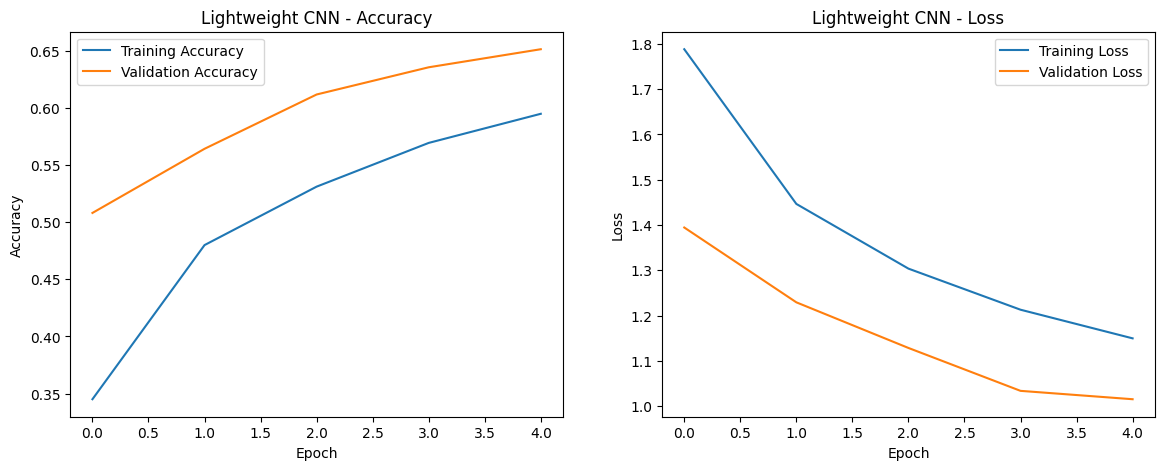

In [17]:
def plot_history(history, model_name):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

print("Training Lightweight CNN:")
lightweight_cnn = build_lightweight_cnn()
history_cnn = lightweight_cnn.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))
plot_history(history_cnn, "Lightweight CNN")

Training MobileNet...


C:\Users\shrushti\AppData\Local\Temp\ipykernel_13804\3494289938.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 317ms/step - accuracy: 0.2231 - loss: 2.8780 - val_accuracy: 0.5452 - val_loss: 1.3356
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 294ms/step - accuracy: 0.5201 - loss: 1.4264 - val_accuracy: 0.6375 - val_loss: 1.0626
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 288ms/step - accuracy: 0.6143 - loss: 1.1549 - val_accuracy: 0.6884 - val_loss: 0.9206
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 275ms/step - accuracy: 0.6761 - loss: 0.9766 - val_accuracy: 0.7153 - val_loss: 0.8352
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 290ms/step - accuracy: 0.7149 - loss: 0.8560 - val_accuracy: 0.7355 - val_loss: 0.7803


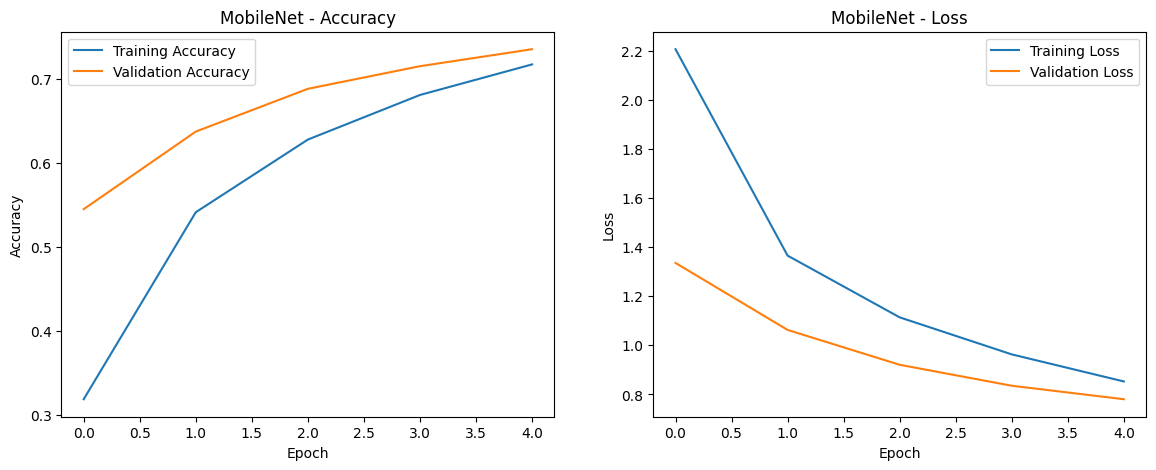

In [18]:
print("Training MobileNet...")
mobilenet_model = build_mobilenet_model()
history_mobilenet = mobilenet_model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))
plot_history(history_mobilenet, "MobileNet")



Training ResNet-18 (approx using ResNet-50)...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1433s 2s/step - accuracy: 0.2792 - loss: 2.4559 - val_accuracy: 0.0916 - val_loss: 14.7548
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1422s 2s/step - accuracy: 0.6563 - loss: 1.0478 - val_accuracy: 0.7214 - val_loss: 0.8756
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.7500 - loss: 0.7576 - val_accuracy: 0.7500 - val_loss: 0.7596
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 34097s 55s/step - accuracy: 0.8040 - loss: 0.5943 - val_accuracy: 0.7735 - val_loss: 0.7339
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 879s 1s/step - accuracy: 0.8465 - loss: 0.4656 - val_accuracy: 0.7751 - val_loss: 0.7946


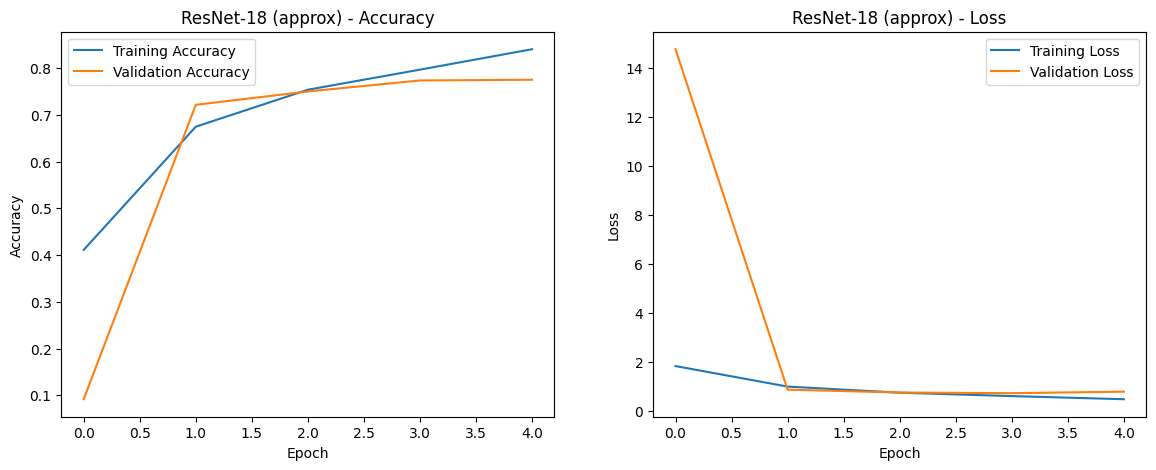

In [8]:
print("Training ResNet-18 (approx using ResNet-50)...")
resnet_model = build_resnet_model()
history_resnet = resnet_model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))
plot_history(history_resnet, "ResNet-18 (approx)")



In [19]:
print("Evaluating Models on Test Set...")
cnn_test_accuracy = lightweight_cnn.evaluate(X_test, y_test, verbose=0)
mobilenet_test_accuracy = mobilenet_model.evaluate(X_test, y_test, verbose=0)
resnet_test_accuracy = resnet_model.evaluate(X_test, y_test, verbose=0)

print(f"Lightweight CNN Test Accuracy: {cnn_test_accuracy[1]:.4f}")
print(f"MobileNet Test Accuracy: {mobilenet_test_accuracy[1]:.4f}")
print(f"ResNet-18 (approx) Test Accuracy: {resnet_test_accuracy[1]:.4f}")

Evaluating Models on Test Set...
Lightweight CNN Test Accuracy: 0.6458
MobileNet Test Accuracy: 0.7343
ResNet-18 (approx) Test Accuracy: 0.7745


In [20]:
training_accuracy = history_resnet.history['accuracy']
print("Training Accuracy per Epoch:", training_accuracy)


Training Accuracy per Epoch: [0.4110499918460846, 0.6746249794960022, 0.753724992275238, 0.7966750264167786, 0.8403750061988831]


In [21]:
train_loss, train_accuracy = resnet_model.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Accuracy: {train_accuracy:.4f}")


Final Training Accuracy: 0.9142


In [22]:
print("Lightweight CNN Training Accuracy per Epoch:", history_cnn.history['accuracy'])
print("MobileNet Training Accuracy per Epoch:", history_mobilenet.history['accuracy'])

Lightweight CNN Training Accuracy per Epoch: [0.34505000710487366, 0.47987499833106995, 0.531000018119812, 0.5692499876022339, 0.5947250127792358]
MobileNet Training Accuracy per Epoch: [0.31907498836517334, 0.5415499806404114, 0.628000020980835, 0.6810500025749207, 0.7174249887466431]


## Evaluate the Final Training Accuracy on the Entire Training Set


In [23]:
cnn_train_loss, cnn_train_accuracy = lightweight_cnn.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Accuracy for Lightweight CNN: {cnn_train_accuracy:.4f}")
mobilenet_train_loss, mobilenet_train_accuracy = mobilenet_model.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Accuracy for MobileNet: {mobilenet_train_accuracy:.4f}")


Final Training Accuracy for Lightweight CNN: 0.6786
Final Training Accuracy for MobileNet: 0.8037


In [24]:
print("Lightweight CNN Training Accuracy per Epoch:", history_cnn.history['accuracy'])
cnn_train_loss, cnn_train_accuracy = lightweight_cnn.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Accuracy for Lightweight CNN: {cnn_train_accuracy:.4f}")
print("MobileNet Training Accuracy per Epoch:", history_mobilenet.history['accuracy'])
mobilenet_train_loss, mobilenet_train_accuracy = mobilenet_model.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Accuracy for MobileNet: {mobilenet_train_accuracy:.4f}")


Lightweight CNN Training Accuracy per Epoch: [0.34505000710487366, 0.47987499833106995, 0.531000018119812, 0.5692499876022339, 0.5947250127792358]
Final Training Accuracy for Lightweight CNN: 0.6786
MobileNet Training Accuracy per Epoch: [0.31907498836517334, 0.5415499806404114, 0.628000020980835, 0.6810500025749207, 0.7174249887466431]
Final Training Accuracy for MobileNet: 0.8037
